# Visualization and Data Exploration

This notebook is mainly to create some visualizations for the talk.

In [1]:
import sys
sys.path.append('../src/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils.plot_utils import set_plot_defaults, plot_price_area
from utils.data_utils import load_data

In [2]:
set_plot_defaults(font="Europace Sans")
d, _, _ = load_data()

The area, in particular the living area, of a home is one of the best predictors for its price.
As we can see in the following plot, its relation is pretty close to a linear relation.

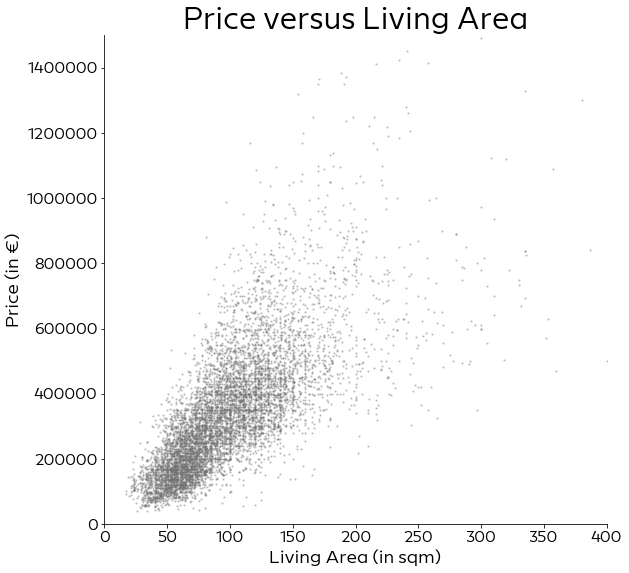

In [3]:
plot_price_area()
plt.show()

One problem though is, that there is quite a spread in prices. If we visualize different ZIP codes from Berlin, it's easy to see that the location explains some of this spread. Makes sense, a house in the middle of nowhere will be much cheaper (no matter how big) than a house in a hip, central area.

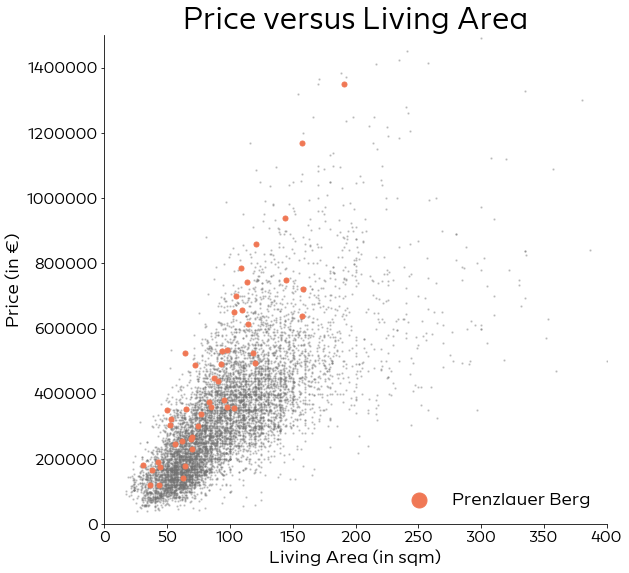

In [4]:
fig, ax = plot_price_area()
ax.scatter(d["living_space"][d.zip == "10405"], d["price"][d.zip == "10405"], color="#f07855", s=25, label="Prenzlauer Berg")
ax.legend(frameon=False, markerscale=3., loc="lower right")
plt.show()

Prenzlauer Berg is one of the most expensive areas in Berlin, whereas for example the ZIP code 13583 in Spandau is much cheaper.

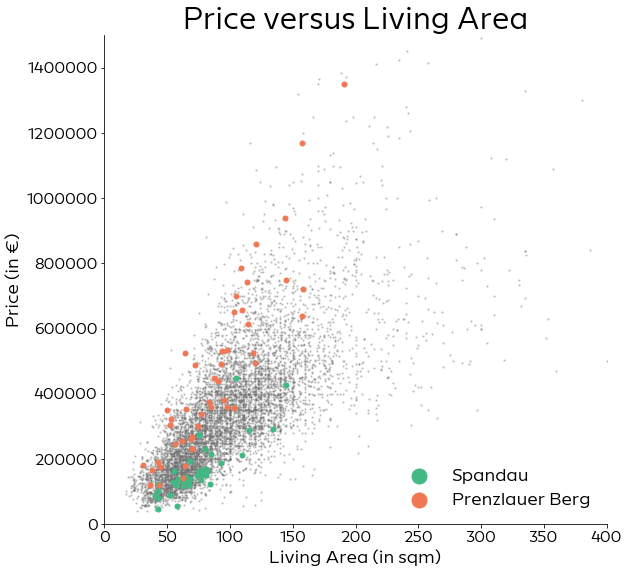

In [5]:
fig, ax = plot_price_area()
ax.scatter(d["living_space"][d.zip == "13583"], d["price"][d.zip == "13583"], color="#42b883", s=25, label="Spandau")
ax.scatter(d["living_space"][d.zip == "10405"], d["price"][d.zip == "10405"], color="#f07855", s=25, label="Prenzlauer Berg")
ax.legend(frameon=False, markerscale=3., loc="lower right")
plt.show()

Seeing these two different ZIP code areas, it seems reasonable to fit one linear model per ZIP code.

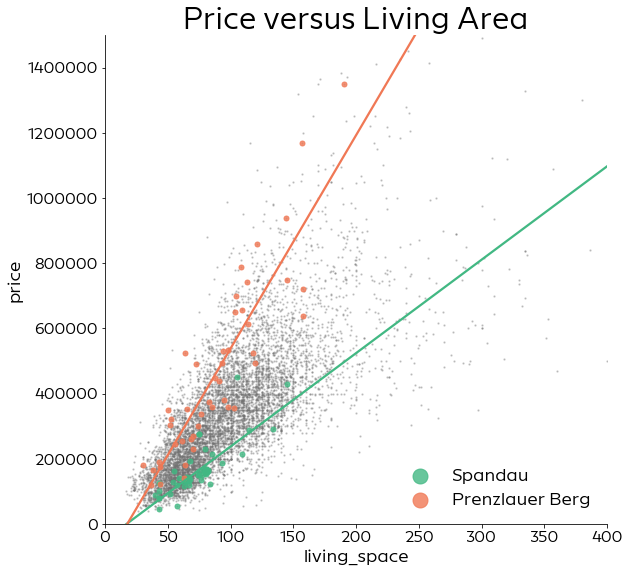

In [6]:
fig, ax = plot_price_area()
sns.regplot(x=d["living_space"][d.zip == "13583"], y=d["price"][d.zip == "13583"], 
            color="#42b883", ax=ax, ci=0, scatter_kws={"s": 25}, label="Spandau")
sns.regplot(x=d["living_space"][d.zip == "10405"], y=d["price"][d.zip == "10405"], 
            color="#f07855", ax=ax, ci=0, scatter_kws={"s": 25}, label="Prenzlauer Berg")
ax.legend(frameon=False,  markerscale=3., loc="lower right")
plt.show()

For these two ZIP codes, the result looks pretty decent. If we compare this however with the ZIP code 10783 in Schöneberg, this approach fails. For some reason, in this area the data contains only 3 observations.

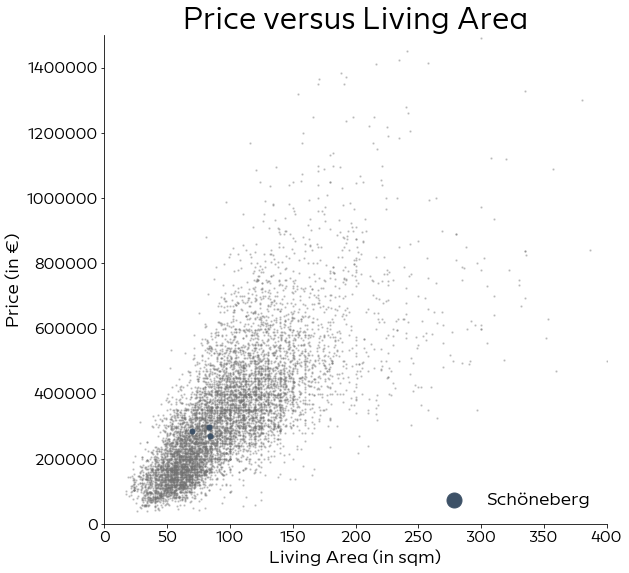

In [7]:
fig, ax = plot_price_area()
ax.scatter(d["living_space"][d.zip == "10783"], d["price"][d.zip == "10783"], color="#3d5167", s=25, label="Schöneberg")
ax.legend(frameon=False,  markerscale=3., loc="lower right")
plt.show()

A model on these three data points results in a very odd model, where larger homes somehow become cheaper.

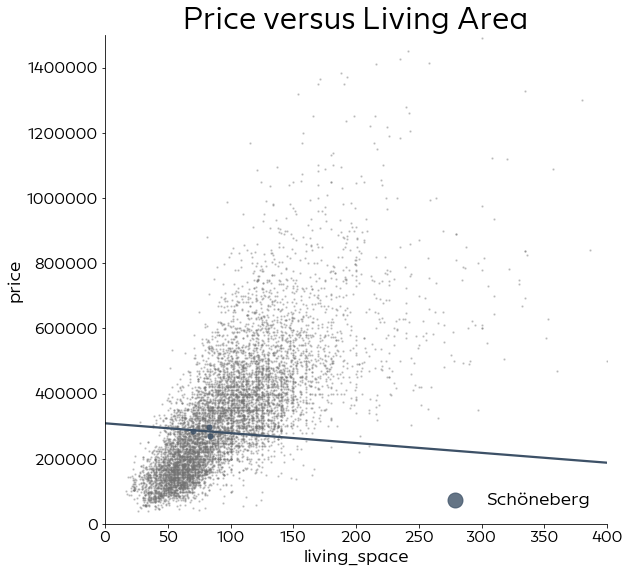

In [8]:
fig, ax = plot_price_area()
sns.regplot(x=d["living_space"][d.zip == "10783"], y=d["price"][d.zip == "10783"], 
            color="#3d5167", ax=ax, ci=0, scatter_kws={"s": 25}, label="Schöneberg")
ax.legend(frameon=False,  markerscale=3., loc="lower right")
plt.show()

For ZIP codes where we have so few data, we would like the resulting model to be closer to the overall linear model of the total data.

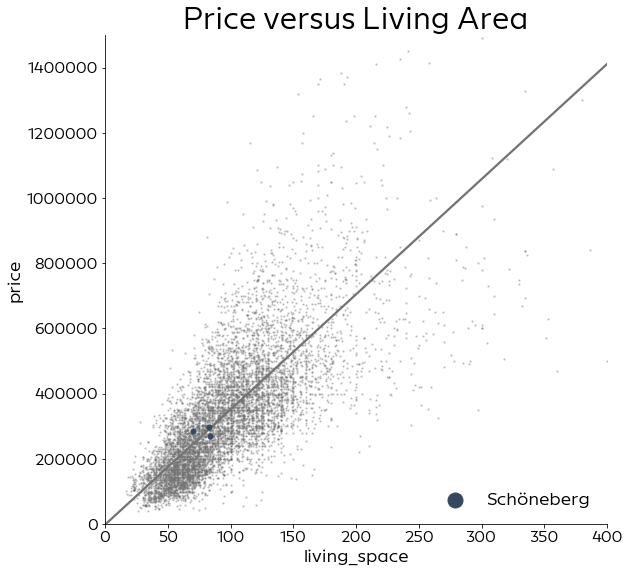

In [9]:
fig, ax = plot_price_area()
ax = sns.regplot(x=d["living_space"][(d.living_space < 200) &  (d.price < 3500000)], 
                                y=d["price"][(d.living_space < 200) &  (d.price < 3500000)], 
            color="#737373", ax=ax, ci=0, scatter_kws={"s": 1.8, "alpha":0.})
ax.scatter(d["living_space"][d.zip == "10783"], d["price"][d.zip == "10783"], color="#35495e", s=25, label="Schöneberg", zorder=10)
ax.legend(frameon=False,  markerscale=3., loc="lower right")
plt.show()

This is the idea behind a Hierarchical Model. We fit one different parameter per group (here the ZIP codes) but define that these parameters come from a common distribution, thus staying close to the overall mean.